Data Exploration

 a guided exploration over the given dataset in this project.

Aim is to perform use some of the most common exploration/aggregation/descriptive operations. 
 
**Out of the 3 datasets listed below:**

**1. Weather dataset should be solved using Python in Jupyter notebook only.**

**2. Surgical dataset using WEKA**

**3. Healthcare_stroke_dataset using R**




# Dataset Details

In this , you will work on 1) 
weather_dataset.csv
The columns of the data-set are:

* Date
* Time
* Temp Humidity Index   
* Outside Temperature
* WindChill
* Hi Temperature
* Low Temperature
* Outside Humidity
* DewPoint
* WindSpeed
* Hi
* Wind Direction
* Rain
* Barometer
* Inside  Temperature
* Inside  Humidity
* ArchivePeriod

In [9]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

#Array processing
import numpy as np
#Data analysis, wrangling and common exploratory operations
import pandas as pd
from pandas import Series, DataFrame
from itertools import chain

#For visualization. Matplotlib for basic viz and seaborn for more stylish figures
import matplotlib.pyplot as plt
import seaborn as sns


# Reading Dataset
The Python code below reads the weather dataset into a Pandas data frame with the name df_data. 
For this code to work, the file 'database.csv' must be in the same folder as this file.

In [10]:
#read the csv file into a Pandas data frame
df_data = pd.read_csv('Weatherdataset.csv',encoding='latin1')
#return the first 5 rows of the dataset
df_data.head()

,Date,Time,Temp Humidity Index,Outside Temperature,WindChill,Hi Temperature,Low Temperature,Outside Humidity,DewPoint,WindSpeed,Hi,Wind Direction,Rain,Barometer,Inside Temperature,Inside Humidity,ArchivePeriod
0,31/05/2006,09:00,9.3,9.3,9.3,9.7,9.1,55,0.8,1,7,NNW,0.0,1015.4,21.7,38,10
1,31/05/2006,09:10,10.1,10.1,10.1,10.4,9.7,53,0.9,2,5,NE,0.0,1015.3,21.9,38,10
2,31/05/2006,09:20,10.7,10.7,10.7,11.0,10.4,52,1.3,2,5,NE,0.0,1015.3,22.1,39,10
3,31/05/2006,09:30,11.2,11.2,11.2,11.3,10.9,52,1.7,1,3,NNW,0.0,1015.2,22.2,38,10
4,31/05/2006,09:40,11.4,11.4,11.4,11.6,11.3,51,1.7,2,6,E,0.0,1015.2,22.3,38,10


In [11]:
df_data['new_Date']=df_data['Date']
df_data['new_Date']= pd.to_datetime(df_data["new_Date"],format='%d/%m/%Y')
df_data.set_index('new_Date',inplace=True)

# Task 1: Statistical Exploratory Data Analysis
Let us start with getting know the dataset. Your first task will be to get some basic information by using Pandas features.

In [12]:
#For each task below, look for a Pandas function to do the task.
#Replace None in each task with your code.

# 1 points
#Task 1-a: Print the details of the df_data data frame (information such as number of rows,columns, name of columns, etc)
print ("Task 1-a: Details of df_data data frame are: \n", ) 
df_data.info()
# 1 points
#Task 1-b: Find the number of rows and columns in the df_data data frame.
print ("Task 1-b: Number of rows:%s and number of columns:%s"  ) 
df_data.shape
print("total number of records are:",df_data.shape[0])
print("total number of attributes are:",df_data.shape[1])
# 1 points
#Task 1-c: Print the descriptive detail (count, unique, top, freq etc) for 'Wind Direction' column of the df_data 
print ("Task 1-c: Descriptive details of 'Wind Direction' column are\n")
df_data['Wind Direction'].describe()
# 1 points
#Task 1-d: Print the average Outside Temperature for each day
print("Task 1-d: The average temp for each day:")
df_data['Outside Temperature'].resample('D').mean()
# 1 points
#Task 1-e: Print the average Outside Temperature for each week
print("Task 1-e: The average temp for each day:")
df_data['Outside Temperature'].resample('w').mean()
# 1 points
#Task 1-f: What is the maximum Outside Temperature difference each day for all the days of the months?
print("Task 1-f: Maximum temperature difference each day for all the days of the months:")
df_data['Outside Temperature'].resample('D').max()
# 1 points
#Task 1-h: What is the minium Outside Temperature difference each day for all the days of the months?
print("Task 1-h: Minium temperature difference each day for all the days of the months:")
df_data['Outside Temperature'].resample('D').min()
#Task 1-i: Display all the unique values for each column.
print("Task 1-i: The unique values for each column are:")
for i in df_data.columns:
    print("Column Name is:\n",i)
    print(df_data[i].unique())

Task 1-a: Details of df_data data frame are: 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4463 entries, 2006-05-31 to 2006-07-01
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    4463 non-null   object 
 1   Time                    4463 non-null   object 
 2   Temp Humidity Index     4463 non-null   float64
 3   Outside Temperature     4463 non-null   float64
 4   WindChill               4463 non-null   float64
 5   Hi Temperature          4463 non-null   float64
 6   Low Temperature         4463 non-null   float64
 7   Outside Humidity        4463 non-null   int64  
 8   DewPoint                4463 non-null   float64
 9   WindSpeed               4463 non-null   int64  
 10  Hi                      4463 non-null   int64  
 11  Wind Direction          4463 non-null   object 
 12  Rain                    4463 non-null   float64
 13  Barometer               4463

# Task 2: Aggregation & Filtering & Rank
In this task, we will perform some very high level aggregation and filtering operations. 
Then, we will apply ranking on the results for some tasks. 
Pandas has a convenient and powerful syntax for aggregation, filtering, and ranking. 
DO NOT write a for loop. Pandas has built-in functions for all tasks. 

In [13]:
df_data['new_Time']=df_data['Time']
df_data['new_Time']=pd.to_datetime(df_data["new_Time"],format='%H:%M')

In [14]:
# 20 points
# Task 2-A: Generate a Outside_Temperature.txt file containing the answers to the following questions: 
# Using the “Outside Temperature” values: 
# a. What is the average time of hottest daily temperature (over month); 
dummy = df_data[['Date','new_Time','Outside Temperature']].groupby(['Date']).max()
avg_tym=dummy['new_Time'].mean()
print(avg_tym)
# b. What time of the day is the most commonly occurring hottest time; 
means = df_data.groupby(['Date', 'Time']).agg({'Outside Temperature':['mean']}).unstack(level=1) # grouping the data based on date and time and doing the mean aggregation over outside temperature
df = df_data.groupby([df_data['Time']])['Outside Temperature'].max() # over the grouping data we collecting max temperature this is the grouping result and it is in pandas core series datatype
v=df.add_suffix("").reset_index() #converting pandas series datatype into pandas dataframe
v1 = v[v['Outside Temperature']==means.max().max()] # here we displaying max outside temperature at the particular time
print(v1)
# c. Which are the Top Ten hottest times on distinct days, preferably sorted by date order.
dfg=means['Outside Temperature'] # time and outside temperature is stored in dfg and it is in the form of pandas core series
dfg.add_suffix("").reset_index() # converting into dataframe
dfg.max(axis=1,skipna=True)   # collecting max temperature for each day
def returncolname(row,colnames): # we have max temperatures now and now we are collecting max time columns with respective to that  particular temperature
    return colnames[np.argmax(row.values)] # so i am returing the function call colmax containing the column that has time w.r.t max temperature and time
dfg['colmax']=dfg.apply(lambda x:returncolname(x,dfg.columns),axis=1) # we assigning the colmax column to the data frame
dfg['Temp']=dfg.max(axis=1,skipna=True) # temperature also added to new column
dfg.sort_values(by='Date') # based on date we sorting the data
dfg1=dfg[['colmax','Temp']].head(10) # returning top 10 records
print(dfg1)
# Write-Overwrites
file2 = open("Outside_Temperature1.txt","a")#Opening a text file and given append mode permissions to the file 
file2.write("AVG TIME OF HOTTEST DAILY TEMPERATURE OVER A MONTH:")
file2.write(str(avg_tym)) # appending high temperature values to the file
file2.write("WHAT TIME OF A DAY IS MOST HOTTEST COMMONLY OCCURING HOTTEST TIME:")
file2.write(str(v1)) # appending the low temperature values to the file
file2.write(" WHICH ARE THE TOP TEN HOTTEST TIMES ON DISTINCT DAYS:")
file2.write(str(dfg1)) # appending the low temperature values to the file
file2.close() # closing the file

# 20 points
#Task 2-B: Using the ‘Hi Temperature’ values produce a “Hi_Temperature.txt” file containing all of the Dates and Times
# where the “Hi Temperature” was within +/- 1 degree of 22.3 or 
# the “Low Temperature” was within +/- 0.2 degree higher or lower of 10.3 over the first 9 days of June
val_dt=df_data['20060601':'20060609'] # we are taking only 9 distinct dates based on date index
#val_dt_ct=val_dt['Date'].value_counts() # we are taking the value counts for the date
rslt_df = val_dt[(val_dt['Hi Temperature'] > 21.3) & (val_dt['Hi Temperature'] <= 23.3)] # filtering the high temperatures within the range
rslt_df_low= val_dt[(val_dt['Low Temperature'] > 10.1) & (val_dt['Low Temperature'] <= 10.5)]# filtering the low temperatures with in the range 
val_high_temp=rslt_df[['Hi Temperature','Time']] # storing the result of high temperature in a variable
val_low_temp=rslt_df_low[['Low Temperature','Time']] # storing the result of low temperature in a variable
# Write-Overwrites
file1 = open("Hi-Temperature.txt1","a")#Opening a text file and given append mode permissions to the file 
file1.write(str(val_high_temp)) # appending high temperature values to the file
file1.write(str(val_low_temp)) # appending the low temperature values to the file
file1.close() # closing the file


1900-01-01 23:21:52.500000
     Time  Outside Temperature
86  14:20                 23.2
                   colmax  Temp
Time                           
Date                           
01/06/2006  (mean, 15:00)  17.2
01/07/2006  (mean, 09:00)  16.0
02/06/2006  (mean, 13:20)  17.7
03/06/2006  (mean, 14:50)  19.6
04/06/2006  (mean, 16:10)  18.0
05/06/2006  (mean, 13:30)  16.1
06/06/2006  (mean, 14:20)  23.2
07/06/2006  (mean, 13:00)  19.6
08/06/2006  (mean, 16:20)  20.7
09/06/2006  (mean, 14:40)  17.9


<ipython-input-14-aed64d24b062>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfg['colmax']=dfg.apply(lambda x:returncolname(x,dfg.columns),axis=1) # we assigning the colmax column to the data frame
<ipython-input-14-aed64d24b062>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfg['Temp']=dfg.max(axis=1,skipna=True) # temperature also added to new column


# Task 3: Visualization
In this task, you will perform a number of visualization tasks to get some intuition about the data. Visualization is a key component of exploration. You can choose to use either Matplotlib or Seaborn for plotting. The default figures generated from Matplotlib might look a bit ugly. So you might want to try Seaborn to get better figures. Seaborn has a variety of styles. Feel free to experiment with them and choose the one you like. We have earmarked 10 points for the aesthetics of your visualizations.

In [15]:
df_data["Date"]= pd.to_datetime(df_data["Date"],format='%d/%m/%Y')
df_data['month'] = df_data['Date'].dt.strftime('%b')

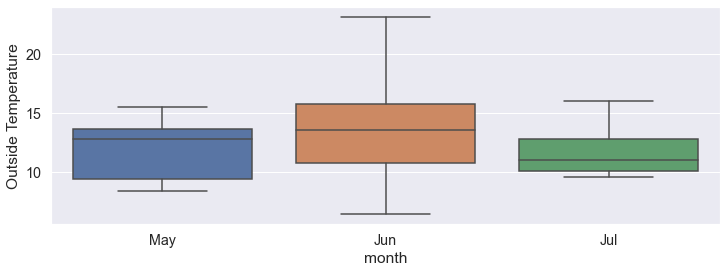

C:\Users\Anu\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Anu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Anu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Anu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a de

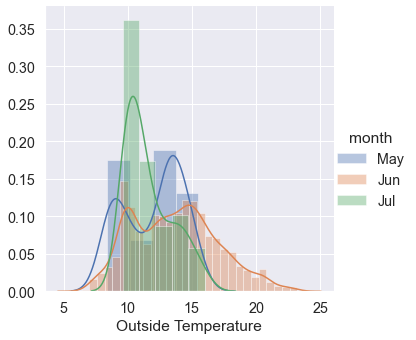

[0.02384811 0.10257004 0.17272517 0.1551285  0.1729567  0.17504052
 0.10280157 0.05255846 0.03218338 0.01018754]
[ 6.4   8.08  9.76 11.44 13.12 14.8  16.48 18.16 19.84 21.52 23.2 ]


IndexError: invalid index to scalar variable.

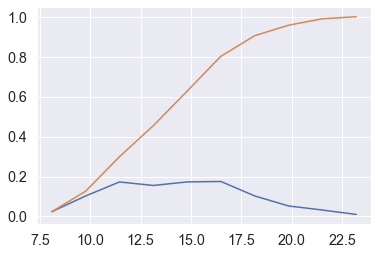

In [16]:
sns.set_style('whitegrid')
sns.set(font_scale = 1.3)

# 5 points
# Task 3-a: Visulalize the temperature for each month  
# Think of a way to nicely visualize all the temperature and provide detailed explaination 
#########################begin code for Task 3-a
fig, ax = plt.subplots()
fig.set_size_inches((12,4))
sns.boxplot(x='month',y='Outside Temperature',data=df_data,ax=ax)
plt.show()
#########################end code for Task 3-a
data_jun = df_data.loc[df_data["month"] == "Jun"];
data_may = df_data.loc[df_data["month"] == "May"];
data_jul = df_data.loc[df_data["month"] == "Jul"];
sns.FacetGrid(df_data, hue="month", size=5) \
   .map(sns.distplot, "Outside Temperature") \
   .add_legend();
plt.show();
counts, bin_edges = np.histogram(data_jun['Outside Temperature'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
# x-axis data points range, Y axis is probability
#compute CDF (percentage of data is shows)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
# 15 points
# Task 3-b: Display the time period on a bar plot which has highest temperature for the first 5 days of every month
# provide detailed explaination 
#########################begin code for Task 3-b 
l1_jun=list()
l2_jun=list()
for i in df_data["Date"].unique():
    #print(i)
    i1=i[:5]
    l1_jun.append(i1)
    #print("Average temparature for each day")
    df_date_single = df_data.loc[df_data["Date"] == i]
    j = df_date_single["Outside Temperature"].max()
    l2_jun.append(j)
    #print("Day:{0} ===>>\t max temparature:{1}".format(i,j))
dict = {'Date': l1_jun, 'ot': l2_jun} 
df = pd.DataFrame(dict)
dict = {'Date': l1_jun, 'ot': l2_jun} 
    
df = pd.DataFrame(dict)
    
val_months= pd.concat([df[:1],df[1:7],df[-1:]])
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(10, 5))
sns.barplot(x = 'Date',
            y = 'ot',
            #hue = 'Date',
            data = val_months)
 
# Show the plot
plt.show()
#########################end code for Task 3-b


# Task 4: 
Find out an 'interesting' information from the dataset. Create two visualization for it and explain in a 4 to 5 lines your valid reasoning. Do not copy paste from another team.
This task is worth 20 points. Your result will be judged based on the uniqueness and quality of your work (having a meaningful result and an aesthetic visualization). 

C:\Users\Anu\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


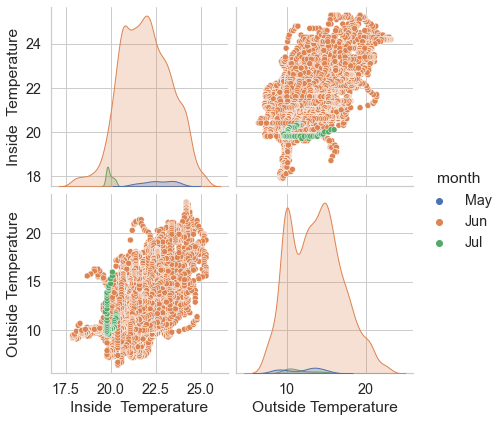

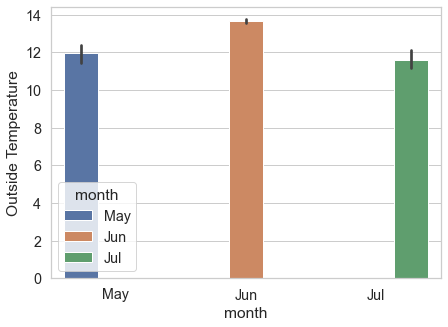

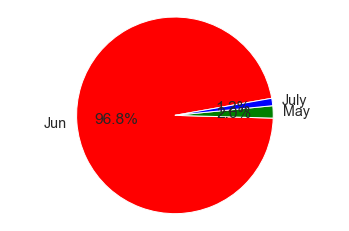

In [17]:
#########################begin code for Task 4
import seaborn as sns
import matplotlib.pyplot as plt

plt.close();
sns.set_style("whitegrid");
dataset=df_data[['Inside  Temperature','month','Outside Temperature']]
sns.pairplot(dataset, hue="month", size=3);
plt.show()

#########################end code for Task 4
fig = plt.figure(figsize =(7, 5))
sns.barplot(x = 'month',
            y = 'Outside Temperature',
            hue = 'month',
            data = df_data)
 
# Show the plot
plt.show()
plt.pie(df_data['month'].value_counts().tolist(), 
        labels=['Jun', 'May', 'July'], colors=['red', 'green','blue'], 
        autopct='%1.1f%%', startangle=10)
axis = plt.axis('equal')

## Report for Python
Report Explanation

You will prepare a **report** in pdf file explainaing the answer for task 2, 3 and 4<br>

Note: the more detailed explanation the better

## Rubricks

Task 1: 8 points<br>
Task 2: 40 points<br>
Task 3: 20 points<br>
Task 4: 20 points<br>
Report : 12 points<br>
------------------------------------
Total : 100 points<br>